<a href="https://colab.research.google.com/github/YopaNelly/AI-ML-Basics/blob/main/Project1_Classifying_crop_dieases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


In [51]:
# Load dataset
df = pd.read_csv('crop_diseases_outbreak - crop_diseases_outbreak.csv')


In [52]:
df.head()

,leaf_color,leaf_size,moisture_level,temperature,humidity,soil_ph,leaf_texture,disease_presence
0,brown,3.584024,94.102708,17.051727,23.038748,5.332352,smooth,0.0
1,green,5.504174,56.963010,29.636397,NaN,7.285618,intermediate,1.0
2,brown,NaN,NaN,15.858537,NaN,NaN,smooth,1.0
3,brown,5.431352,60.538561,29.845945,44.280810,5.414740,rough,1.0
4,green,6.684490,61.630765,32.595453,21.927812,5.796965,smooth,1.0


In [53]:
#DATA PREPEOCESSING

In [54]:
df.describe()

,leaf_size,moisture_level,temperature,humidity,soil_ph,disease_presence
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9800.000000
mean,6.005854,50.009817,24.997425,50.127370,6.511915,0.304388
std,2.298885,28.982527,5.764326,17.379882,0.860796,0.460171
min,2.000949,0.000930,15.000410,20.005596,5.000387,0.000000
25%,4.053788,24.808573,20.091610,35.061334,5.772785,0.000000
50%,6.012571,49.818545,25.058657,50.049248,6.512270,0.000000
75%,7.970577,75.154799,29.988668,65.344643,7.258344,1.000000
max,9.999141,99.989106,34.999477,79.987827,7.999585,1.000000


In [55]:
df.shape

(10000, 8)

In [56]:
df.isnull().sum()

leaf_color             0
leaf_size           1000
moisture_level      1000
temperature         1000
humidity            1000
soil_ph             1000
leaf_texture           0
disease_presence     200
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   leaf_color        10000 non-null  object 
 1   leaf_size         9000 non-null   float64
 2   moisture_level    9000 non-null   float64
 3   temperature       9000 non-null   float64
 4   humidity          9000 non-null   float64
 5   soil_ph           9000 non-null   float64
 6   leaf_texture      10000 non-null  object 
 7   disease_presence  9800 non-null   float64
dtypes: float64(6), object(2)
memory usage: 625.1+ KB


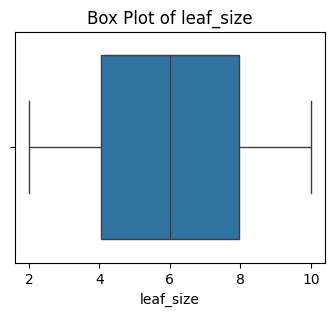

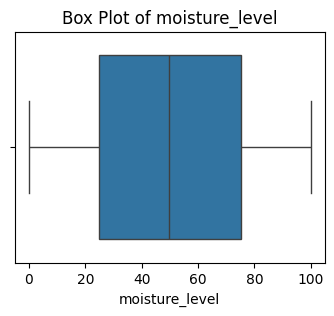

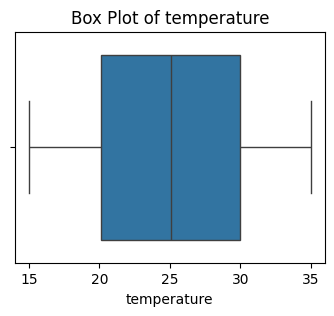

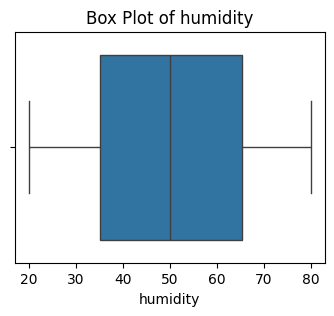

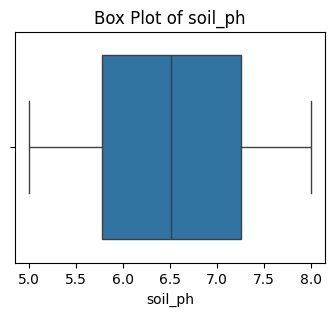

In [58]:
# find if there are out layers in each colunms

import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through numerical columns and create box plots
for column in numeric_features:
  plt.figure(figsize=(4, 3))  # Adjust figure size as needed
  sns.boxplot(x=df[column])
  plt.title(f'Box Plot of {column}')
  plt.show()


In [59]:
df.head()

,leaf_color,leaf_size,moisture_level,temperature,humidity,soil_ph,leaf_texture,disease_presence
0,brown,3.584024,94.102708,17.051727,23.038748,5.332352,smooth,0.0
1,green,5.504174,56.963010,29.636397,NaN,7.285618,intermediate,1.0
2,brown,NaN,NaN,15.858537,NaN,NaN,smooth,1.0
3,brown,5.431352,60.538561,29.845945,44.280810,5.414740,rough,1.0
4,green,6.684490,61.630765,32.595453,21.927812,5.796965,smooth,1.0


In [86]:
# convert all features to categorical data and put it in a new df_2 and all  non numerical values to numerical

df_2 = df.copy()

# Convert all features to categorical
for column in df_2.columns:
  df_2[column] = df_2[column].astype('category')

# Convert categorical features to numerical codes
for column in df_2.columns:
  df_2[column] = df_2[column].cat.codes

df_2.head()


,leaf_size,moisture_level,temperature,humidity,soil_ph,disease_presence,leaf_color_code,leaf_texture_code
0,1758,8452,919,418,960,0,0,2
1,3955,5085,6603,-1,6841,1,1,0
2,-1,-1,400,-1,-1,1,0,2
3,3862,5416,6690,3625,1211,1,0,1
4,5296,5502,7928,265,2321,1,1,2


In [78]:
df_2.describe()

,leaf_size,moisture_level,temperature,humidity,soil_ph,disease_presence,leaf_color_code,leaf_texture_code
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4049.450000,4049.450000,4049.450000,4049.450000,4049.450000,0.278300,1.004800,0.998800
std,2810.461673,2810.461673,2810.461673,2810.461673,2810.461673,0.490788,0.815257,0.812813
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,1499.750000,1499.750000,1499.750000,1499.750000,1499.750000,0.000000,0.000000,0.000000
50%,3999.500000,3999.500000,3999.500000,3999.500000,3999.500000,0.000000,1.000000,1.000000
75%,6499.250000,6499.250000,6499.250000,6499.250000,6499.250000,1.000000,2.000000,2.000000
max,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,1.000000,2.000000,2.000000


In [79]:

# Drop rows with any null values
df_2 = df.dropna()

# Verify the changes
print(df_2.isnull().sum())
df_2.shape


leaf_size            0
moisture_level       0
temperature          0
humidity             0
soil_ph              0
disease_presence     0
leaf_color_code      0
leaf_texture_code    0
dtype: int64


(5815, 8)

In [80]:
df.describe()

,leaf_size,moisture_level,temperature,humidity,soil_ph,disease_presence,leaf_color_code,leaf_texture_code
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9800.000000,10000.000000,10000.000000
mean,6.005854,50.009817,24.997425,50.127370,6.511915,0.304388,1.004800,0.998800
std,2.298885,28.982527,5.764326,17.379882,0.860796,0.460171,0.815257,0.812813
min,2.000949,0.000930,15.000410,20.005596,5.000387,0.000000,0.000000,0.000000
25%,4.053788,24.808573,20.091610,35.061334,5.772785,0.000000,0.000000,0.000000
50%,6.012571,49.818545,25.058657,50.049248,6.512270,0.000000,1.000000,1.000000
75%,7.970577,75.154799,29.988668,65.344643,7.258344,1.000000,2.000000,2.000000
max,9.999141,99.989106,34.999477,79.987827,7.999585,1.000000,2.000000,2.000000


In [81]:
df_2.shape

(5815, 8)

In [82]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5815 entries, 0 to 9996
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   leaf_size          5815 non-null   float64
 1   moisture_level     5815 non-null   float64
 2   temperature        5815 non-null   float64
 3   humidity           5815 non-null   float64
 4   soil_ph            5815 non-null   float64
 5   disease_presence   5815 non-null   float64
 6   leaf_color_code    5815 non-null   int8   
 7   leaf_texture_code  5815 non-null   int8   
dtypes: float64(6), int8(2)
memory usage: 329.4 KB


In [35]:
df.describe()

,leaf_size,moisture_level,temperature,humidity,soil_ph,disease_presence,leaf_color_code,leaf_texture_code
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9800.000000,10000.000000,10000.000000
mean,6.005854,50.009817,24.997425,50.127370,6.511915,0.304388,1.004800,0.998800
std,2.298885,28.982527,5.764326,17.379882,0.860796,0.460171,0.815257,0.812813
min,2.000949,0.000930,15.000410,20.005596,5.000387,0.000000,0.000000,0.000000
25%,4.053788,24.808573,20.091610,35.061334,5.772785,0.000000,0.000000,0.000000
50%,6.012571,49.818545,25.058657,50.049248,6.512270,0.000000,1.000000,1.000000
75%,7.970577,75.154799,29.988668,65.344643,7.258344,1.000000,2.000000,2.000000
max,9.999141,99.989106,34.999477,79.987827,7.999585,1.000000,2.000000,2.000000


In [83]:
# Split data
X = df_2.drop('disease_presence', axis=1)
y = df_2['disease_presence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [85]:
# Predict and evaluate
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 0.6809974204643164
Precision: 0.585627691426805
Recall: 0.6809974204643164
Confusion Matrix:
 [[781  20]
 [351  11]]
